#                                WINE QUALITY PREDICTION DATASET

PROJECT DESCRIPTION:
    It’s a known fact that the older the wine, the better the taste. However, 
there are several factors other than age that go into wine quality certification which 
include physiochemical tests like alcohol quantity, fixed acidity, volatile acidity, 
determination of density, pH, and more. The main goal of this machine learning 
project is to build a machine learning model to predict the quality of wines by 
exploring their various chemical properties. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
import pandas as pd
df=pd.read_csv(r'D:\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values so we can proceed further 

In [7]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [8]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


# DATA VISUALIZATION

Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals.
The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, 
and new insights about the information represented in the data.

Let's do some plotting to know how the data columns are distributed in the dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

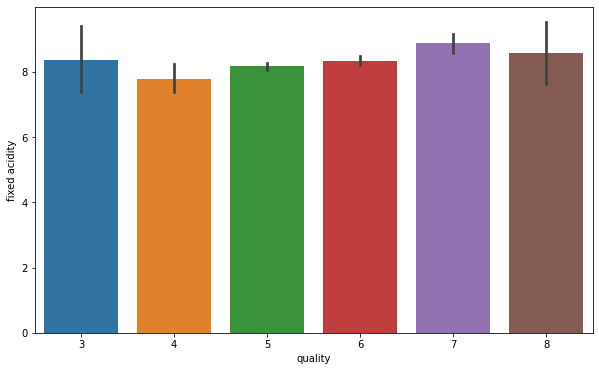

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

#Here we see that fixed acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

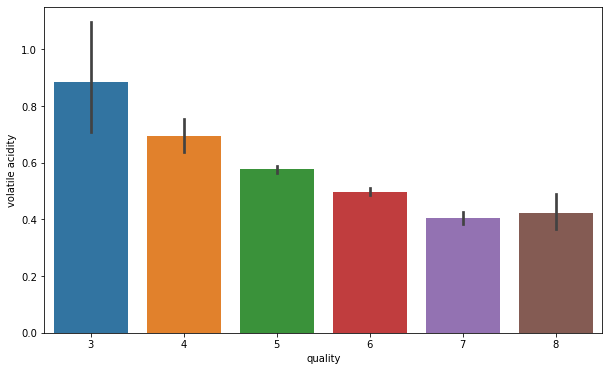

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

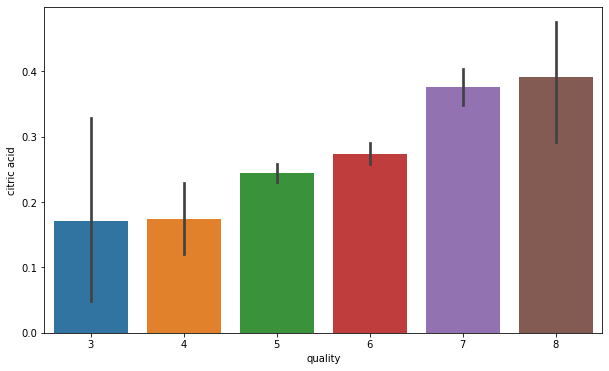

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

#Composition of citric acid go higher as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

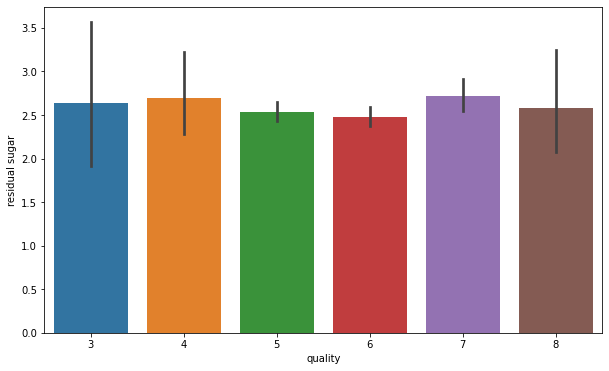

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

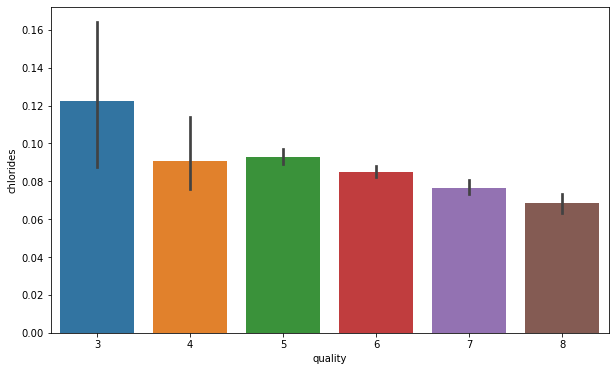

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

#Composition of chloride also go down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

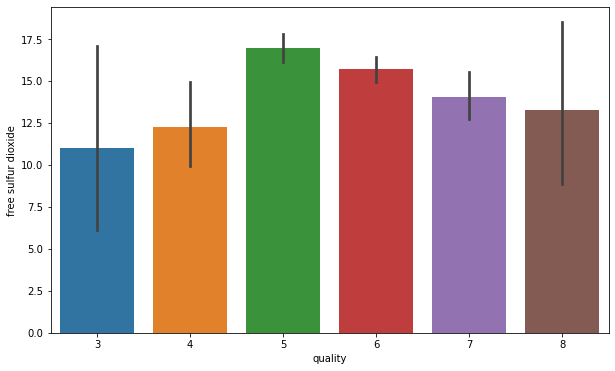

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

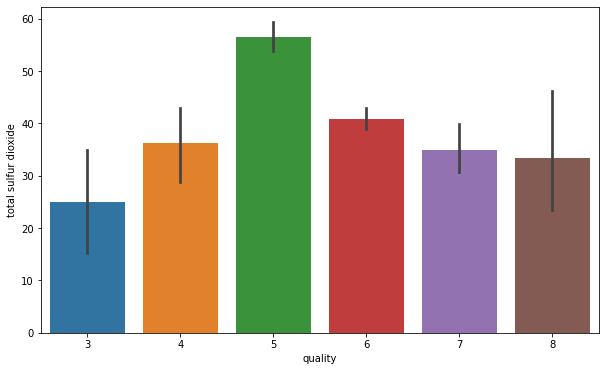

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

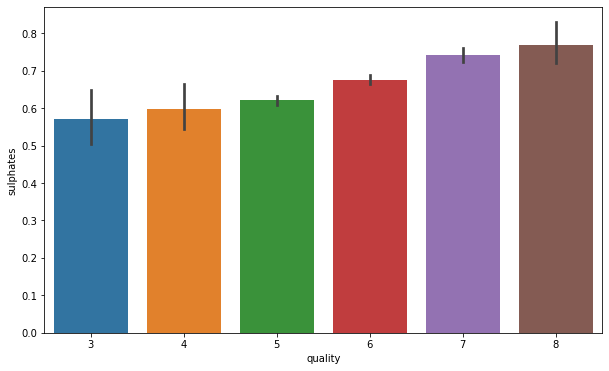

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

#Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

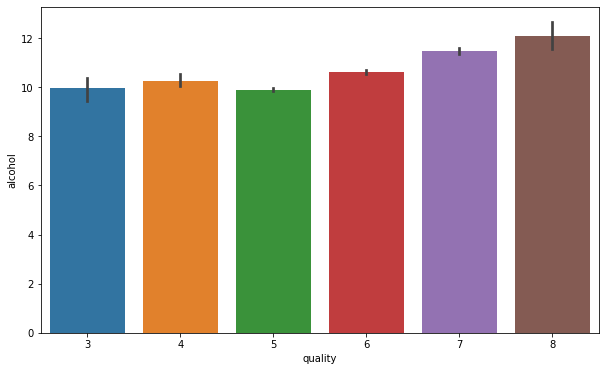

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

#Alcohol level also goes higher as the quality of wine increases

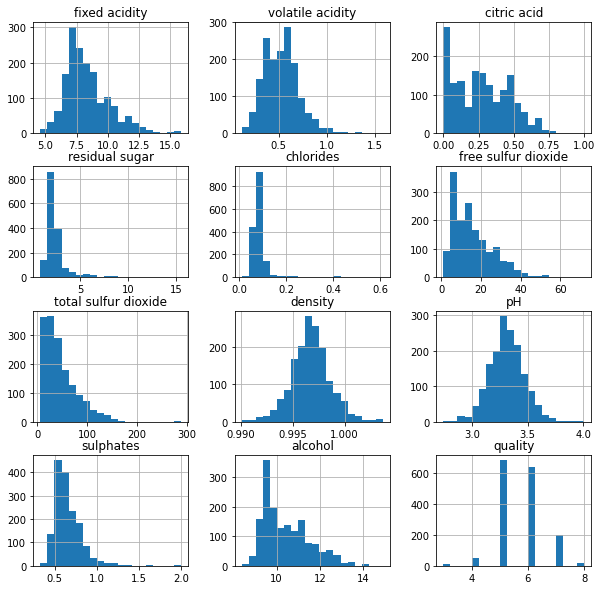

In [19]:
#plot histogram
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

<AxesSubplot:>

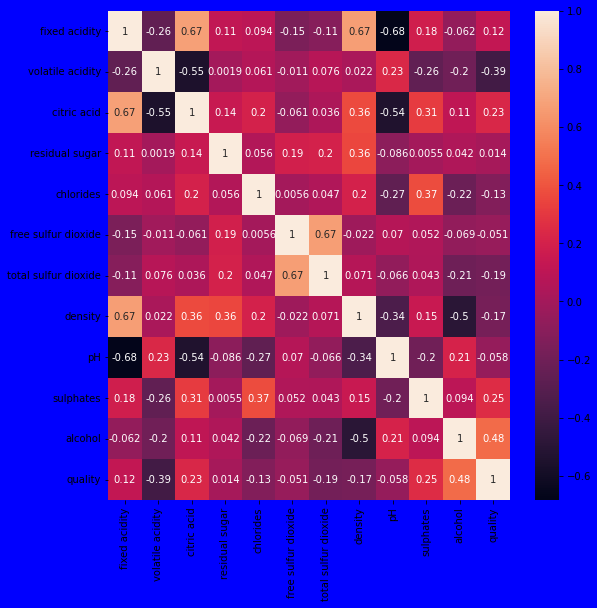

In [20]:
# ploting heatmap
plt.figure(figsize=[9,9],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

In [21]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [22]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [23]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [61]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

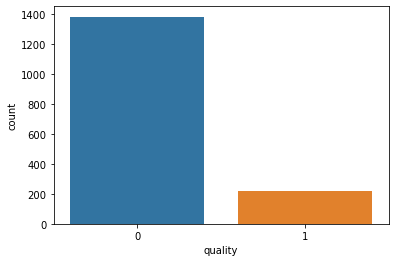

In [62]:
sns.countplot(df['quality'])

# MULTIPLE LINEAR REGRESSION

In [26]:
#There are total 12 features in the dataset, in which basically QUALITY is our dependent feature, 
#and the rest of them are our independent features
X = df.drop('quality', axis = 1)
y = df['quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [29]:
y_prediction =  LR.predict(X_test)

In [30]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.25848488186125107
mean_sqrd_error is== 0.09291387188318641
root_mean_squared error of is== 0.30481776831934587


In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score)

0.25848488186125107


lower the mean_squared_error the lower the value the better and 0 means the model is perfect
so, our model has 0.09 MSE


# LASSO REGRESSION

In [32]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)
#Predicting the score 
score = lassoReg.score(X_test,y_test)
print("Accuracy:",score)

Accuracy: 0.23729293073645708


Therefore <we can see that LASSO REGRESSION GAVE 24% ACCURACY>

# LOGISTIC REGRESSION

In [35]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(accuracy_score(y_test,pred))

0.865625


Therefore <we can see that LOGISTIC REGRESSION GAVE 86% ACCURACY>

# DECISION TREE

In [38]:
#training the test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
dtree = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=23)
model = dtree.fit(X_train, y_train)
y_prediction = dtree.predict(X_test)
model.score(X_test, y_prediction)

1.0

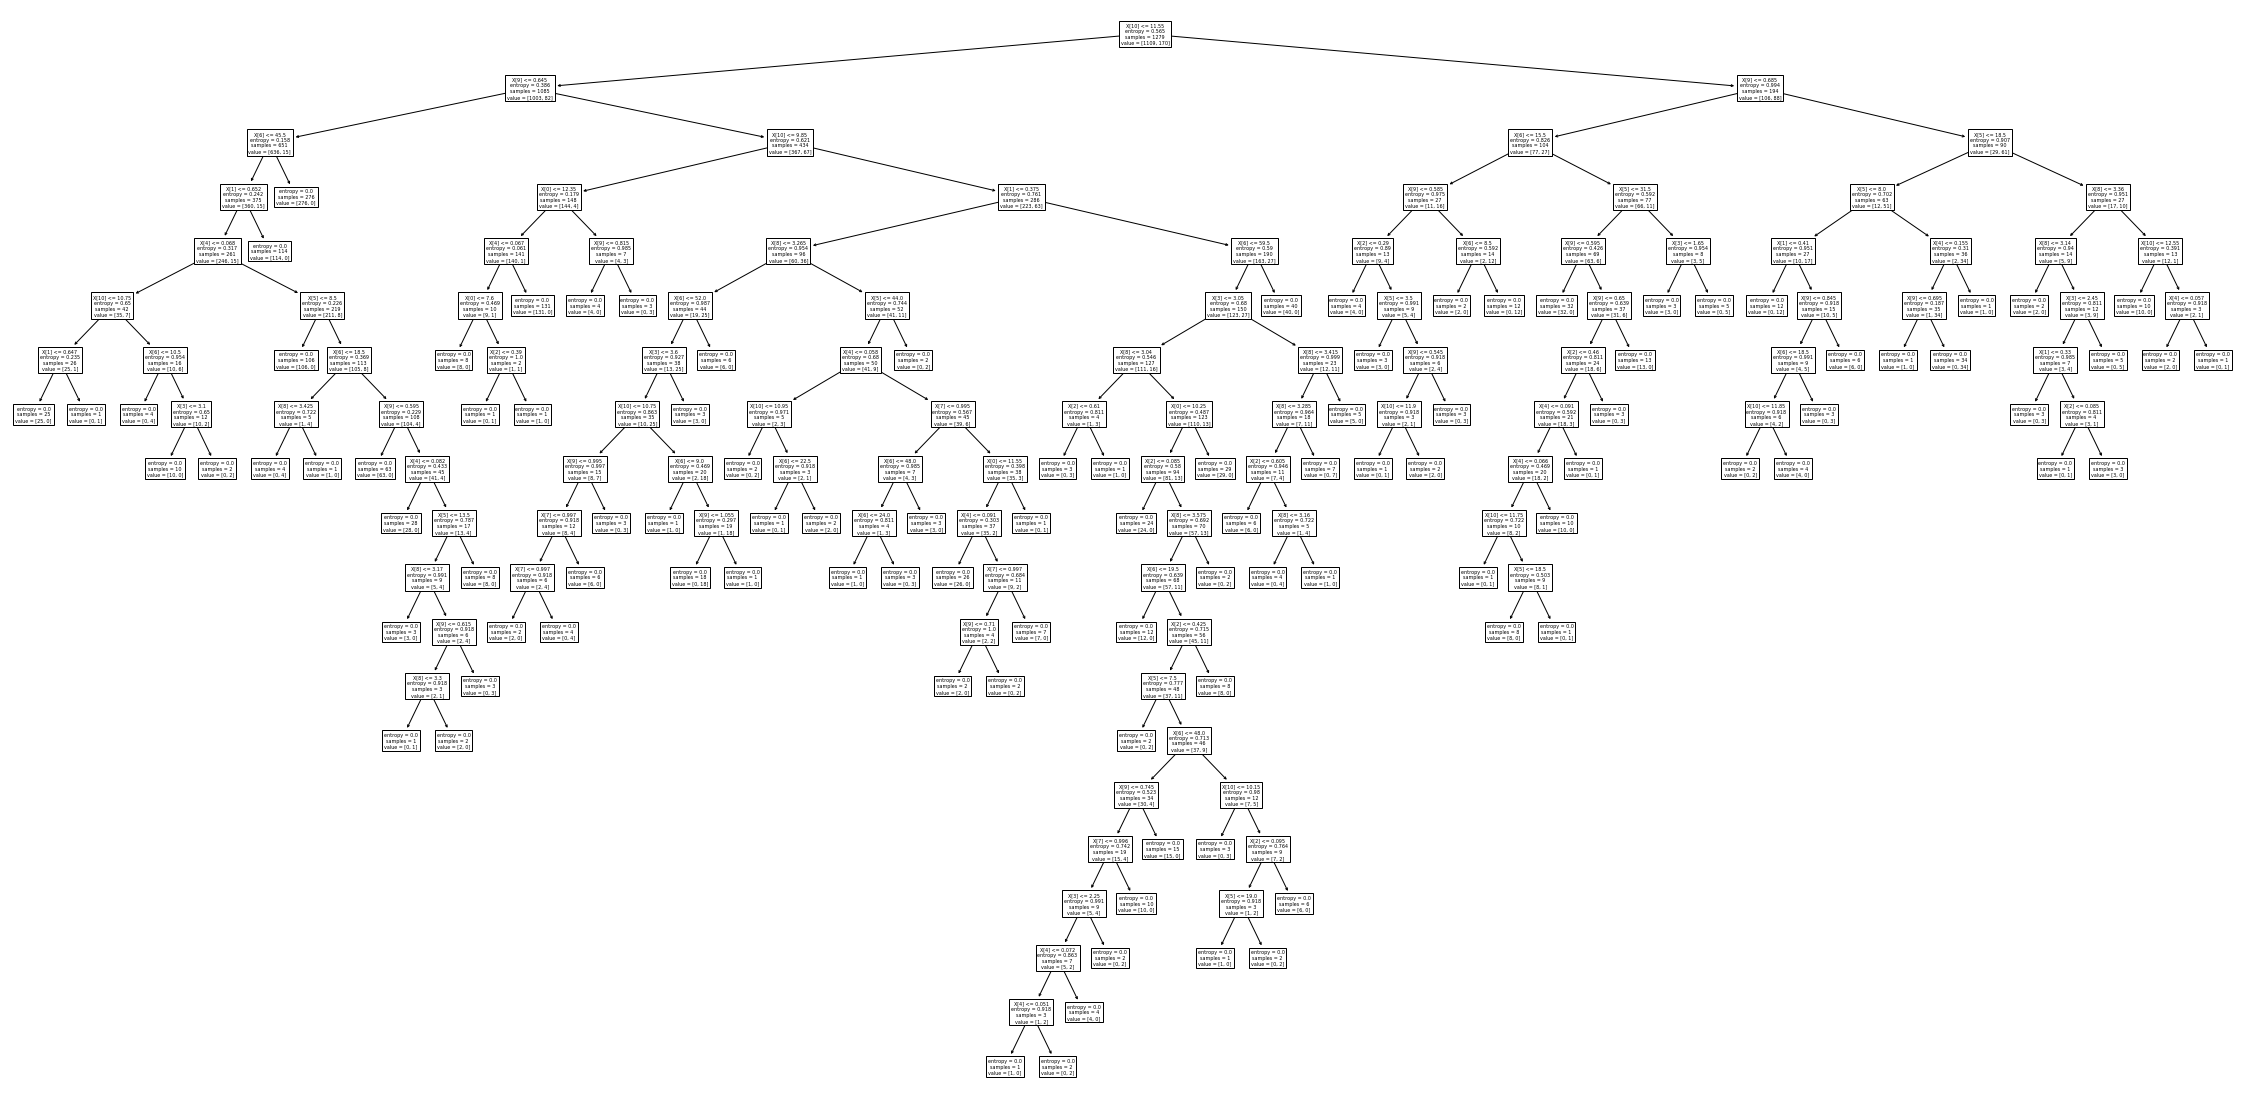

In [39]:
from sklearn import tree
plt.figure(figsize=(40,20))
x=tree.plot_tree(dtree)

From the graph, we know that the decision tree is overfitting since it branches exhaustively on the training set.

the training accuracy is 1.0, which means it predicts perfectly for every training data.

# ADABOOST CLASSIFIER

In [40]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
print('X_train size is: ',len(X_train))
print('y_test size is: ',len(y_test))

X_train size is:  1279
y_test size is:  320


In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)

In [46]:
#Train Adaboost Classifer
model = abc.fit(X_train, y_train)

In [47]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [48]:
#confusion matrix for adaboost
print(confusion_matrix(y_test, y_pred))

[[255  18]
 [ 32  15]]


In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84375


Therefore we can see that <ADABOOST HAS GIVEN 84% >

# SUPPORT VECTOR CLASSIFIER

In [50]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [51]:
#confusion matrix for svc
print(confusion_matrix(y_test, pred_svc))

[[273   0]
 [ 46   1]]


In [52]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



Therefore <we can see that SUPPORT VECTOR CLASSIFIER GAVE 86% ACCURACY>

# RANDOM FOREST

In [53]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [54]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
print(len(X_train))
print(len(y_test))

1279
320


In [56]:
rfc = RandomForestClassifier(n_estimators=450,max_depth =  14)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
rnd_score = rfc.score(X_test,y_test)
print('score of model is : ',rnd_score)

score of model is :  0.9


In [57]:
#confusion matrix for rfc
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 23  24]]


In [59]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



Therefore <we can see that RANDOM FOREST GAVE 90% ACCURACY>

In [60]:
x_predict = list(rfc.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
976,0,0
1493,0,0
706,0,0
613,0,0
1587,0,0


According to our output, we saw that the original testing values are as much similar to our RandomForestClassifier model predicted values. Here 1 represents the quality  which is considered in good quality wine and 0 represents the quality  which is not considered as a good quality wine. 